# Instrument Variable

* https://www.youtube.com/watch?v=IXyqNuy6Z0k

In [21]:
# Measurement Error
##################

rm(list=ls())
require(sem)

In [22]:
options(repr.plot.width=4, repr.plot.height=3)



In [23]:
library("sem")

In [24]:
set.seed(1234)

X <- runif(200, min=-10, max=10)
X1 <- X + rnorm(200, mean=0, sd=3)

pr.W <- pnorm(X, mean=0, sd=2)
W <- as.numeric(runif(200)<pr.W)

y <- 2 + 3*X + rnorm(200, mean=0, sd=2)

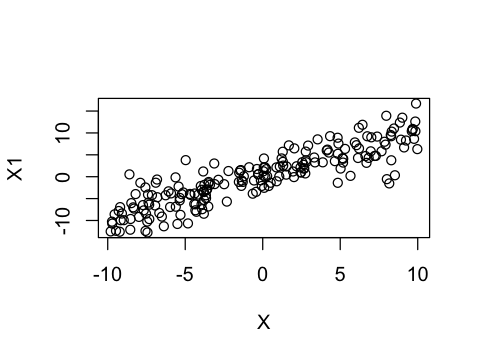

In [25]:
# We can see that x1 is just x with some noise
plot(X1 ~ X)

In [26]:
# we create an instrument variable which is just 0 and 1
W

[1] 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 [38] 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1
 [75] 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1
[112] 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1
[149] 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1
[186] 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1

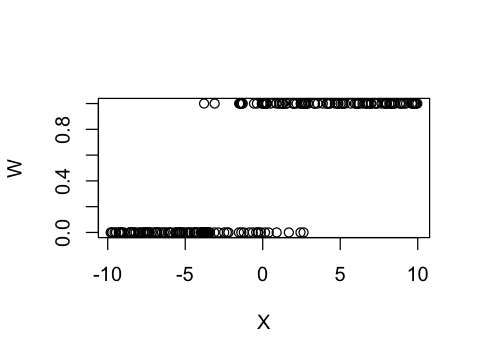

In [27]:
# it is a logit relationship
# the larger X the more W is close to 1
plot( W ~ X)

**Real model**

$$
y = 2 + 3X + \epsilon 
$$

**Use measurement only**: we have what is called "Attenuation Bias"

$$
y = 0.93 + 2.38X
$$

**Use 2SLS**
$$
y = 0.96 + 3X
$$

In [28]:
# use measurement only
summary(lm(y~X1))


Call:
lm(formula = y ~ X1)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.8857  -5.3301  -0.3363   5.7417  28.6710 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.93527    0.59608   1.569    0.118    
X1           2.38885    0.09376  25.479   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.43 on 198 degrees of freedom
Multiple R-squared:  0.7663,	Adjusted R-squared:  0.7651 
F-statistic: 649.2 on 1 and 198 DF,  p-value: < 2.2e-16


In [29]:
# try a 2SLS model
summary(tsls(y~X1, ~W))


 2SLS Estimates

Model Formula: y ~ X1

Instruments: ~W

Residuals:
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-26.044610  -5.395938  -0.003049   0.000000   5.593957  29.631307 

             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 0.9612794  0.6629328  1.45004  0.14863    
X1          3.0309338  0.1401096 21.63260  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.3749414 on 198 degrees of freedom


## We can increase the sample size

* The normal model does not change much
* the 2SLS gets better

In [32]:
set.seed(1234)

n_sample = 2000

X <- runif(n_sample, min=-10, max=10)
X1 <- X + rnorm(n_sample, mean=0, sd=3)

pr.W <- pnorm(X, mean=0, sd=2)
W <- as.numeric(runif(n_sample)<pr.W)

y <- 2 + 3*X + rnorm(n_sample, mean=0, sd=2)

# use measurement only
summary(lm(y~X1))


Call:
lm(formula = y ~ X1)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.2390  -5.8009  -0.0581   5.5870  29.9242 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.81143    0.18224    9.94   <2e-16 ***
X1           2.35873    0.02821   83.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.15 on 1998 degrees of freedom
Multiple R-squared:  0.7777,	Adjusted R-squared:  0.7776 
F-statistic:  6990 on 1 and 1998 DF,  p-value: < 2.2e-16


In [33]:
# try a 2SLS model
summary(tsls(y~X1, ~W))


 2SLS Estimates

Model Formula: y ~ X1

Instruments: ~W

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-27.59757  -6.14369   0.05638   0.00000   5.95938  31.01050 

              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 1.81092597 0.20289811  8.92530 < 2.22e-16 ***
X1          2.97598779 0.04215457 70.59703 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.0738794 on 1998 degrees of freedom


## Omitted Variable Bias

In [34]:
set.seed(1234)

# W will be the instrument variable
Z <- as.numeric(runif(500) < 0.5)
W <- as.numeric(runif(500) < 0.5)

X <- rnorm(500, mean=2*Z+W, sd=1)
y <- 2 + 3*X + 2*Z + rnorm(500, mean=0, sd=1)

**Real model**

$$
y = 2 + 3X  + 2Z + \epsilon 
$$

**Use measurement only**: 

$$
y = 2.38 + 3.44X
$$

**Use 2SLS**
$$
y = 0.96 + 3X
$$

In [36]:
# coefficients are too big, which reflect the omitted variable biais
# of leaving out Z which is probably correlated with X, let's see below
summary(lm(y ~X))



Call:
lm(formula = y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7829 -0.8328 -0.0160  0.7375  3.8805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.37810    0.07236   32.87   <2e-16 ***
X            3.44845    0.03560   96.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.177 on 498 degrees of freedom
Multiple R-squared:  0.9496,	Adjusted R-squared:  0.9495 
F-statistic:  9386 on 1 and 498 DF,  p-value: < 2.2e-16


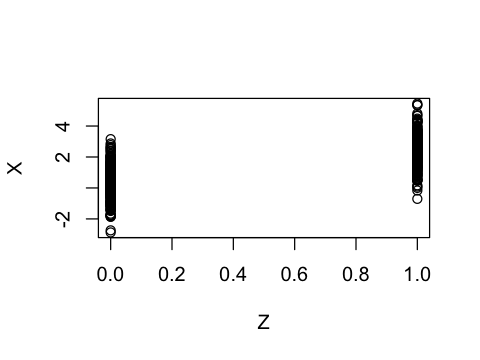

In [37]:
# Yes, they are positively correlated by omitting Z
# we took some of the positive correlation btw Z and Y and we suck that
# into the estimated relationship btw X and Y
plot(X ~ Z)

In [38]:
# If we add Z everything goes back to normal, if we control for source
# of spurious correlation
summary(lm(y~X+Z))



Call:
lm(formula = y ~ X + Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.98513 -0.61789  0.03498  0.65430  2.67768 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.06250    0.06068   33.99   <2e-16 ***
X            2.99258    0.03918   76.38   <2e-16 ***
Z            1.95788    0.11591   16.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.939 on 497 degrees of freedom
Multiple R-squared:  0.968,	Adjusted R-squared:  0.9679 
F-statistic:  7515 on 2 and 497 DF,  p-value: < 2.2e-16


In [39]:
# 2SLS model - the estimate with the 2SLS or normal model
# are quite similar; Z is nowhere in the model
summary(tsls(y ~X, ~W))


 2SLS Estimates

Model Formula: y ~ X

Instruments: ~W

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.89454 -0.91912  0.01981  0.00000  0.93173  3.73783 

             Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 2.8398744  0.1652035 17.19015 < 2.22e-16 ***
X           3.1174257  0.1111501 28.04699 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.2750475 on 498 degrees of freedom


In [40]:
# as explained during the talk we can add Z as a control
# if we do so we have to add all the exogenous control variable as instrument
# -> we don't do much better

summary(tsls(y ~X + Z, ~W + Z))


 2SLS Estimates

Model Formula: y ~ X + Z

Instruments: ~W + Z

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.03110 -0.62419  0.02438  0.00000  0.65672  2.78174 

              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 2.03403052 0.06858527 29.65696 < 2.22e-16 ***
X           3.06296274 0.08743284 35.03218 < 2.22e-16 ***
Z           1.81444001 0.19712378  9.20457 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9420677 on 497 degrees of freedom


## Endogeneity

In [44]:
set.seed(1234)

# Create an endogenous fake data set
W <- runif(500, min=-5, max=5) # this is the instrumental variable
y <- c()
X <- c()

# y = 3 + X + u1
# X = 4 + W + 2Y + u2 # endogeneous relationship

# [ y -x] = [ 3 + u1]
# [ -2y x] = [ 4 + W + u2]

for(i in 1:500){
    mat <- matrix(data=c(1,-1,-2,1), nrow=2, ncol=2, byrow=T)
    YY <- qr.solve(mat, b=c(3 + rnorm(1, mean=0, sd=2), 4 + W[i] + rnorm(1, mean=0, sd=2)))
    y[i] <- YY[1]
    X[i] <- YY[2]
}

In [45]:
# the true coefficient of X is 1 we have an endogeneity problem
model <- lm(y ~X)
summary(model)



Call:
lm(formula = y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8724 -0.8282 -0.0269  0.8874  4.3760 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.20817    0.12303   1.692   0.0913 .  
X            0.72291    0.01092  66.226   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.315 on 498 degrees of freedom
Multiple R-squared:  0.898,	Adjusted R-squared:  0.8978 
F-statistic:  4386 on 1 and 498 DF,  p-value: < 2.2e-16


In [46]:
summary(tsls(y ~X, ~W))


 2SLS Estimates

Model Formula: y ~ X

Instruments: ~W

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-5.72770 -1.23654 -0.05057  0.00000  1.33049  5.36302 

              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 2.87349741 0.29828050  9.63354 < 2.22e-16 ***
X           0.99211529 0.02879798 34.45086 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9592099 on 498 degrees of freedom


## More exogenous variables

we can add control with the 2tsls

In [ ]:
set.seed(1234)

# Create an endogenous fake data set
W <- runif(500, min=-5, max=5) # this is the instrumental variable
# Y does not cause Z, X does not cause Z, but Z cause Y and Z causes X
Z <- runif(500, min=-5, max=5) # this is the exogenous variable 

y <- c()
X <- c()

# y = 3 + X + 2Z + u1
# X = 4 + 2Y + W - 0.5Z + u2 # endogeneous relationship

# [ y -x] = [ 3 + 2Z + u1]
# [ -2y x] = [ 4 - 0.5Z + W + u2]

for(i in 1:500){
    mat <- matrix(data=c(1,-1,-2,1), nrow=2, ncol=2, byrow=T)
    YY <- qr.solve(mat, b=c(3 + rnorm(1, mean=0, sd=2), 4 + W[i] + rnorm(1, mean=0, sd=2)))
    y[i] <- YY[1]
    X[i] <- YY[2]
}

In [47]:
# we get an attenuated estimate for Z and X
model <- lm(y ~X + Z)
summary(model)


Call:
lm(formula = y ~ X + Z)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3448 -0.6785  0.0090  0.7137  3.8028 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.54523    0.14663  -10.54   <2e-16 ***
X            0.63491    0.01035   61.34   <2e-16 ***
Z            1.81511    0.11152   16.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.063 on 497 degrees of freedom
Multiple R-squared:  0.9335,	Adjusted R-squared:  0.9332 
F-statistic:  3487 on 2 and 497 DF,  p-value: < 2.2e-16


In [48]:
# try a 2SLS model
summary(tsls(y ~X + Z, ~W)) # does not work

ERROR: Error in chol.default(XtZ %*% invZtZ %*% t(XtZ)): the leading minor of order 3 is not positive definite


In [49]:
summary(tsls(y~X, ~W))


 2SLS Estimates

Model Formula: y ~ X

Instruments: ~W

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-5.72770 -1.23654 -0.05057  0.00000  1.33049  5.36302 

              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 2.87349741 0.29828050  9.63354 < 2.22e-16 ***
X           0.99211529 0.02879798 34.45086 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9592099 on 498 degrees of freedom


In [50]:
# we are supposed to look at the sd error of X from this model and the one above
# and the one below is supposed to be smaller but no
summary(tsls(y~X+Z, ~Z+W))


 2SLS Estimates

Model Formula: y ~ X + Z

Instruments: ~Z + W

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-7.62885 -1.65216  0.01572  0.00000  1.68581  6.54787 

               Estimate  Std. Error  t value   Pr(>|t|)    
(Intercept)  4.65991248  1.16525669  3.99904 7.3263e-05 ***
X            1.12595892  0.09138438 12.32113 < 2.22e-16 ***
Z           -0.94910204  0.56092059 -1.69204   0.091264 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.4990729 on 497 degrees of freedom


## The Wald Estimator

In [52]:
set.seed(1234)

# Create an endogenous fake data set
W <- rbinom(2000, size=1, prob=0.5) # this is the instrumental variable
# Y does not cause Z, X does not cause Z, but Z cause Y and Z causes X
Z <- runif(2000, min=-5, max=5) # this is the exogenous variable 

y <- c()
X <- c()

# y = 3 + X + 2Z + u1
# X = 4 + 2Y + W + 0.5Z + u2 # endogeneous relationship

# [ y -x] = [ 3 + 2Z + u1]
# [ -2y x] = [ 4 - 0.5Z + W + u2]

for(i in 1:2000){
    mat <- matrix(data=c(1,-1,-2,1), nrow=2, ncol=2, byrow=T)
    YY <- qr.solve(mat, b=c(3 + rnorm(1, mean=0, sd=2), 4 + W[i] + rnorm(1, mean=0, sd=2)))
    y[i] <- YY[1]
    X[i] <- YY[2]
}

In [53]:
# as usual it gives bad results
model <- lm(y ~X + Z)
summary(model)


Call:
lm(formula = y ~ X + Z)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2040 -0.5946 -0.0155  0.6086  2.8740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.156087   0.051554 -22.425   <2e-16 ***
X            0.604116   0.004499 134.265   <2e-16 ***
Z            0.003052   0.007009   0.435    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9021 on 1997 degrees of freedom
Multiple R-squared:  0.9004,	Adjusted R-squared:  0.9003 
F-statistic:  9025 on 2 and 1997 DF,  p-value: < 2.2e-16


In [54]:
# what we will do is calculating by hand the Wald estimator
dat <- data.frame(W, X, y, Z)
numerator <- mean(subset(dat, select=y, subset=W==1)$y) - mean(subset(dat, select=y, subset=W==0)$y)
denominator <- mean(subset(dat, select=X, subset=W==1)$X) - mean(subset(dat, select=X, subset=W==0)$X)
wald <- numerator / denominator
wald


[1] 0.9727783

In [55]:
# 2SLS model
summary(tsls(y ~ X, ~W))


 2SLS Estimates

Model Formula: y ~ X

Instruments: ~W

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-5.74802 -1.33620 -0.05923  0.00000  1.31993  6.71675 

              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 2.73214603 0.78792352  3.46753 0.00053639 ***
X           0.97277832 0.07460212 13.03955 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.8849062 on 1998 degrees of freedom


In [56]:
summary(tsls(y ~ X + Z, ~W+Z))


 2SLS Estimates

Model Formula: y ~ X + Z

Instruments: ~W + Z

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-5.80286 -1.33570 -0.07908  0.00000  1.33608  6.71289 

              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 2.71000834 0.78022937  3.47335 0.00052496 ***
X           0.97077108 0.07388876 13.13828 < 2.22e-16 ***
Z           0.02499421 0.01522282  1.64189 0.10076989    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.8760871 on 1997 degrees of freedom


## We can have more than one instrument --> to finish

In [65]:
set.seed(1234)

# Create an endogenous fake data set
K <- runif(500, min=-5, max=5) # this is one instrumental variable for y
L <- runif(500, min=-5, max=5) # this is one instrumental variable for y
M <- runif(500, min=-5, max=5) # this is one instrumental variable for X
N <- runif(500, min=-5, max=5) # this is one instrumental variable for X
Z <- runif(500, min=-5, max=5) # a common exogenous variable
y <- c()
X <- c()

# y = 3 + X + 2Z - K + 0.25L + u1
# X = 4 - 2*Y + 0.5Z + 3M - 0.1N + u2

# [ y - x] = [ 3 + 2Z + K + 0.25L + u1]
# [ 2y x] = [ 4 - 0.5Z + 3M - 0.1N + u2]

for (i in 1:500){
    mat <- matrix(data=c(1, -1, 2, 1), nrow=2, ncol=2, byrow=T)
    YY <- qr.solve(mat, b=c(3 + 2*Z[i] + K[i] + 0.25*L[i] + rnorm(1, mean=0, sd=1), 4 - 0.5* Z[i] +  
                   3* M[i] - 0.1*N[i] + rnorm(1, mean=0, sd=1)))
    
    y[i] <- YY[1]
    X[i] <- YY[2]
}

In [66]:
# try a standard OLS model
model <- lm(y ~X + K + L + Z)
summary(model)


Call:
lm(formula = y ~ X + K + L + Z)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2171 -0.6616 -0.0040  0.6755  2.9612 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.95373    0.04721   62.57   <2e-16 ***
X            0.92767    0.01562   59.41   <2e-16 ***
K            0.94559    0.01901   49.73   <2e-16 ***
L            0.24436    0.01545   15.81   <2e-16 ***
Z            1.87561    0.02912   64.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.019 on 495 degrees of freedom
Multiple R-squared:  0.9083,	Adjusted R-squared:  0.9076 
F-statistic:  1226 on 4 and 495 DF,  p-value: < 2.2e-16


In [67]:
summary(tsls(y ~X, ~M))
summary(tsls(y ~X, ~M+N))


 2SLS Estimates

Model Formula: y ~ X

Instruments: ~M

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-13.79514  -4.73787   0.07514   0.00000   4.82310  14.37211 

              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 3.21803474 0.29738233 10.82120 < 2.22e-16 ***
X           0.92175021 0.09334346  9.87482 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.3252228 on 498 degrees of freedom



 2SLS Estimates

Model Formula: y ~ X

Instruments: ~M + N

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-13.07293  -4.68351  -0.04969   0.00000   4.67791  13.49753 

              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 3.16000301 0.28318423 11.15882 < 2.22e-16 ***
X           0.86271519 0.08670587  9.94991 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.0385743 on 498 degrees of freedom


In [68]:
summary(tsls(y ~X+K+L+Z, ~M+K+L+Z))


 2SLS Estimates

Model Formula: y ~ X + K + L + Z

Instruments: ~M + K + L + Z

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.01791 -0.65867 -0.05401  0.00000  0.71622  3.30730 

              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 3.01868158 0.04869162 61.99592 < 2.22e-16 ***
X           1.01186991 0.01665668 60.74858 < 2.22e-16 ***
K           0.99958578 0.01976659 50.56946 < 2.22e-16 ***
L           0.25692909 0.01591380 16.14505 < 2.22e-16 ***
Z           2.00663733 0.03073365 65.29122 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.0489038 on 495 degrees of freedom


In [69]:
summary(tsls(y ~X+K+L+Z, ~M+N+K+L+Z))


 2SLS Estimates

Model Formula: y ~ X + K + L + Z

Instruments: ~M + N + K + L + Z

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0184 -0.6584 -0.0535  0.0000  0.7155  3.3065 

              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 3.01853113 0.04868267 62.00422 < 2.22e-16 ***
X           1.01167485 0.01664129 60.79304 < 2.22e-16 ***
K           0.99946070 0.01975946 50.58137 < 2.22e-16 ***
L           0.25689997 0.01591145 16.14560 < 2.22e-16 ***
Z           2.00633380 0.03071231 65.32669 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.0487691 on 495 degrees of freedom
